# SONAR MINE DETECTION

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

## Reading Sonar Data

In [54]:
df = pd.read_csv("/Users/rohitsuvarna/Downloads/sonar.csv",header= None)
df[60] = df[60].map({'Mine': 1, 'Rock': 0})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,0
1,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,0
2,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,1
3,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,1
4,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,0


In [55]:
r = df[60].as_matrix()
r = r.reshape(r.shape[0],1)

X = df.as_matrix()[:,:60]

rows = df.shape[0]

In [56]:
def h(y):
    return max(1/(1 + np.exp(-1*y)),np.exp(-16))

hv = np.vectorize(h)

### Cross entropy error function

In [57]:
def cross_ent_err(r,y):
    r1 = r
    y1 = np.log(y)
    r2 = 1 - r
    #y2 = np.log(1-y)
    y2 = 1 - y
    low_val = y2 < np.exp(-16)
    y2[low_val] = np.exp(-16)
    y2 = np.log(y2)
    res = np.dot(r1.T,y1) + np.dot(r2.T,y2)
    return -1*res[0]
    

### Logistic Regression Function

In [58]:
def logistic_reg(eta,num_iters):
    w = np.ones((60,1))*0.5
    w_0 = 0.5
    err = []
    for iter_ in range(num_iters):
        y = np.dot(X,w) + w_0
        y = hv(y)
        err.append(cross_ent_err(r,y))
        t = (r - y).T
        w += eta*np.dot(t,X).T
        w_0 += eta*sum(r - y)[0]
    y = np.dot(X,w) + w_0
    y = hv(y)
    err.append(cross_ent_err(r,y))
    return err,w,w_0
        

### Plots for various eta values

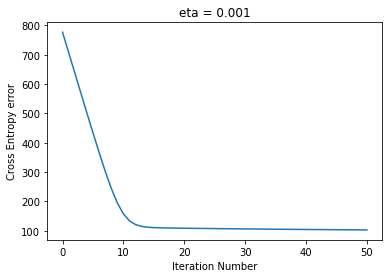

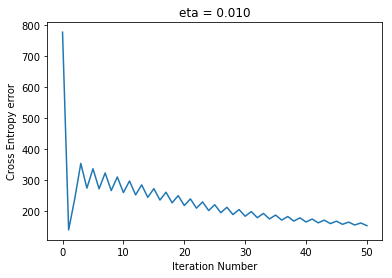

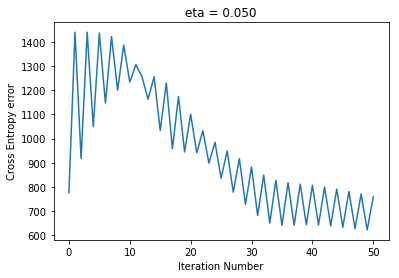

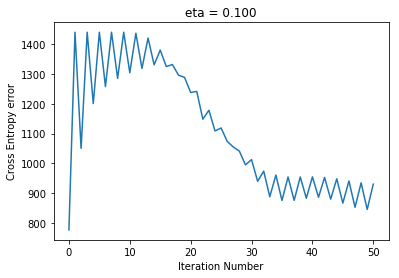

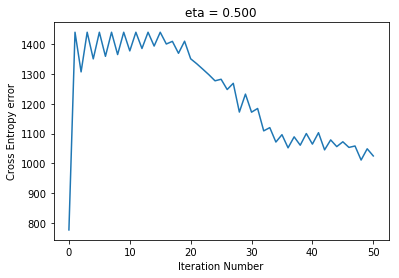

/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


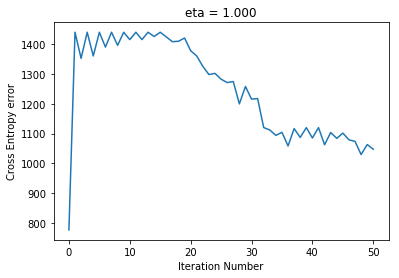

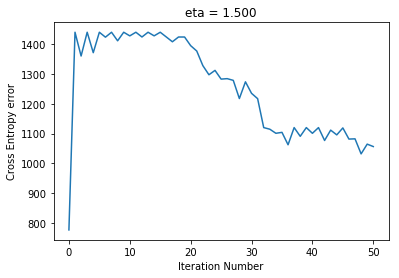

In [59]:
eta_list = [0.001,0.01,0.05,0.1,0.5,1,1.5]

for eta in eta_list:
    error,w,w_0 = logistic_reg(eta,50)
    plt.plot(error)
    plt.xlabel('Iteration Number')
    plt.ylabel('Cross Entropy error')
    plt.title("eta = %0.3f"%eta)
    plt.show()

In [60]:
def class_err(eta,num_iters):
    err,w,w_0 = logistic_reg(eta,num_iters)
    pred = np.dot(X,w) + w_0
    pred = hv(pred)
    class_1 = pred > 0.5
    class_2 = pred <= 0.5
    pred[class_1] = 1
    pred[class_2] = 0 
    l = pred == r
    misses = np.count_nonzero(l == False)
    cls_err = misses/pred.shape[0]
    crs_err = err[-1][0]
    l2 = LA.norm(w)
    return crs_err,cls_err,l2
    
    
    

In [61]:
res = np.zeros((7,3))
i = 0
for eta in eta_list:
    res[i,:] = class_err(eta,50)
    i+= 1

/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [62]:
res = pd.DataFrame(res.T)

res.columns = [0.001,0.01,0.05,0.1,0.5,1,1.5]

res.index.names = [None]

res = res.rename(index={res.index[0]: 'Cross entropy error'})
res = res.rename(index={res.index[1]: 'Classification Error'})
res = res.rename(index={res.index[2]: 'L2 norm'})

res

,0.001,0.01,0.05,0.1,0.5,1.0,1.5
Cross entropy error,102.695001,152.485400,759.863103,930.220904,1024.835427,1047.440507,1056.344387
Classification Error,0.283333,0.361111,0.361111,0.366667,0.366667,0.366667,0.366667
L2 norm,2.615655,6.596876,32.759740,65.007498,324.261835,649.271341,973.892434
